# Siddharth Shakya
### SMS Filtering
### 1. Data Exploration :


### 1.1 Check For Class Imbalance

In [2]:
import sklearn
import pandas as pd
from IPython.display import display

In [3]:
smsData = pd.read_csv('C:\\DataSets\\SmsSpam\\TRAIN_SMS.csv',encoding = "ISO-8859-1")
smsData.head()

,Label,Message
0,ham,oh how abt 2 days before Christmas
1,info,"Welcome to OVATION HOLD R.No. 184, 114, 395, 3..."
2,info,Thank you for using your ICICI bank CREDITcard...
3,ham,schedule a meeting with the entire team in the...
4,ham,Tommy is my brother


In [4]:
print("Labels : ",smsData['Label'].unique())
display(smsData['Label'].unique().size)
print("Class Frequency In Data :")
display(smsData['Label'].value_counts()/smsData['Label'].count())

Labels :  ['ham' 'info' 'spam']


3

Class Frequency In Data :


info    0.445833
ham     0.333333
spam    0.220833
Name: Label, dtype: float64

#### Spam messages are only 22% of data, there is class imbalance

### 1.2 Quick Glance Over Dataset

In [5]:
spamMsgs = smsData[smsData['Label']=='spam']
hamMsgs = smsData[smsData['Label']=='ham']
infoMsgs = smsData[smsData['Label']=='info']
#display(spamMsgs)
#display(infoMsgs)
#display(hamMsgs)

##### A quick scroll over messages of different class indicates that spam and info messages are more similar to each other as opposed to ham. 
##### Spam and Info both seem be sent from some company to their customer, wheras ham seems more like a snippet from a chat between people who knew each other and is more cleaner to look at with realatively less special and numeric characters.
##### It might be easier to distigusih ham from other messages, but realatively harder to distinguish spam and info from each other. 

In [6]:
display(smsData.groupby('Label').describe())

Message                                                               
        count unique                                                top freq
Label                                                                       
ham     10000   9977  When n where is the 97th Canadian Chemistry Co...    2
info    13375  13375  Repair ref.no for your car is JC55257167 opene...    1
spam     6625   6569  Delivered: Your package withStories of Tenali ...    4

### 1.3 Is Message Length Helpful ?

,Label,Message,length
0,ham,oh how abt 2 days before Christmas,34
1,info,"Welcome to OVATION HOLD R.No. 184, 114, 395, 3...",95
2,info,Thank you for using your ICICI bank CREDITcard...,115
3,ham,schedule a meeting with the entire team in the...,62
4,ham,Tommy is my brother,19


length                                                         
         count        mean        std   min    25%    50%    75%    max
Label                                                                  
ham    10000.0   37.980900  18.887832   7.0   25.0   34.0   46.0  310.0
info   13375.0  163.831925  55.802155  71.0  135.0  151.0  175.0  359.0
spam    6625.0  139.638340  54.318755  32.0  113.0  138.0  167.0  768.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E1A6BAC18>,
      dtype=object)

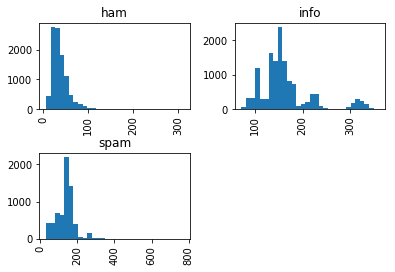

In [7]:
smsData['length'] = smsData['Message'].map(lambda msg: len(msg))
display(smsData.head())
display(smsData.groupby('Label').describe())
%matplotlib inline
smsData.hist(column='length', by='Label', bins=30)

#### We see that summary statistics for length of spam and info are closer to each other compared to ham messages. Histogram plots also suggest the difference in length distribution for different classes. So length of the messages seems to be helpful feature to include in training dataset

### 1.4 Are First Words Of Messages Informative ?

In [8]:
spamFirstWord = spamMsgs['Message'].map(lambda msg: msg.split(' ')[0])
infoFirstWord = infoMsgs['Message'].map(lambda msg: msg.split(' ')[0])
hamFirstWord  = hamMsgs['Message'].map(lambda msg: msg.split(' ')[0])
print('\nspam : ')
display(spamFirstWord.describe())
spam30 = spamFirstWord.value_counts()[0:30]
#display(list(spam30.index))

print('\ninfo : ')
display(infoFirstWord.describe())
info30 = infoFirstWord.value_counts()[0:30]
#display(list(info30.index))

print('\nham : ')
display(hamFirstWord.describe())
ham30 = hamFirstWord.value_counts()[0:30]
#display(list(ham30.index))


spam : 


count     6625
unique     756
top       Dear
freq      2213
Name: Message, dtype: object


info : 


count     13375
unique     1857
top       Thank
freq       1375
Name: Message, dtype: object


ham : 


count     10000
unique     1709
top           i
freq        684
Name: Message, dtype: object

#### High frequency first words (ignoring stop words) in different classes seem to be of the same type, with most of them being greetings like hi, dear,  etc.. or peson's name, so this doesn't seem to be helpful.

### Next thing to explore would be frequency of special characters, stop words and all capitalized words etc. in sentences of different classes

In [9]:
import nltk as nl
import nltk.data as nd
from nltk.corpus import stopwords


sMsgs = spamMsgs['Message']
#display(sMsgs)
hMsgs = hamMsgs['Message']
#display(hMsgs)
iMsgs = infoMsgs['Message']
#display(iMsgs)

''' Fraction Of Stop Words In Messages :
    In vector representation stop words will be removed but possibly
    their distribution could differ in sentences of different classes
    and may be a good feature
    
    Fraction Of Special Characters In Messages :
    It is expected that there will be fewer Special Characters in info
    messages compared to spam and ham
    
'''

stopwordList = list(stopwords.words('english')) # Stopwords
spclCharList = ['#','^','!','(',')','`','~','%','/','\\' ,'{','}',']','[']

spamStopCountFrac=[]
spamSpclCountFrac=[]

hamStopCountFrac=[]
hamSpclCountFrac=[]

infoStopCountFrac=[]
infoSpclCountFrac=[]

for msg in sMsgs:
    stopCount=0
    stopCountFrac=0
    spclCount=0
    spclCountFrac=0
    
    msgTokens = nl.word_tokenize(msg)
    for sw in stopwordList:
        stopCount = stopCount + msgTokens.count(sw)
    
    for sp in spclCharList:
        spclCount = spclCount + msg.count(sp)
    
    stopCountFrac=stopCount/len(msgTokens)
    spclCountFrac=spclCount/len(msg)
    
    spamStopCountFrac.append(stopCountFrac)
    spamSpclCountFrac.append(spclCountFrac)


for msg in hMsgs:
    stopCount=0
    stopCountFrac=0
    spclCount=0
    spclCountFrac=0
    
    msgTokens = nl.word_tokenize(msg)
    for sw in stopwordList:
        stopCount = stopCount + msgTokens.count(sw)

    for sp in spclCharList:
        spclCount = spclCount + msg.count(sp)
    
    
    stopCountFrac=stopCount/len(msgTokens)
    spclCountFrac=spclCount/len(msg)
    
    hamStopCountFrac.append(stopCountFrac)
    hamSpclCountFrac.append(spclCountFrac)

for msg in iMsgs:
    stopCount=0
    stopCountFrac=0
    spclCount=0
    spclCountFrac=0
    
    msgTokens = nl.word_tokenize(msg)
    for sw in stopwordList:
        stopCount = stopCount + msgTokens.count(sw)

    for sp in spclCharList:
        spclCount = spclCount + msg.count(sp)
    
    stopCountFrac=stopCount/len(msgTokens)
    spclCountFrac=spclCount/len(msg)
    
    infoStopCountFrac.append(stopCountFrac)
    infoSpclCountFrac.append(spclCountFrac)

### 1.5 Fraction Of Stop Words

,infoStopCountFrac
count,13375.000000
mean,0.188914
std,0.110322
min,0.000000
25%,0.071429
50%,0.187500
75%,0.303030
max,0.406250


g:\anaconda3\envs\python35\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


,hamStopCountFrac
count,10000.000000
mean,0.317470
std,0.154166
min,0.000000
25%,0.210526
50%,0.333333
75%,0.428571
max,0.875000


,spamStopCountFrac
count,6625.000000
mean,0.212157
std,0.096600
min,0.000000
25%,0.148148
50%,0.200000
75%,0.292683
max,0.500000


Text(0.5, 1.0, 'Stop Word Fraction In Spam Messages')

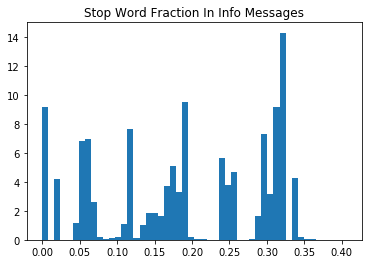

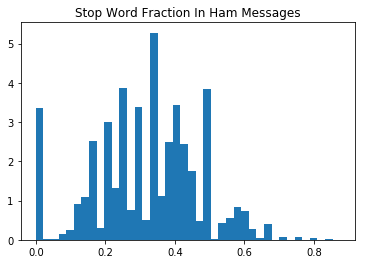

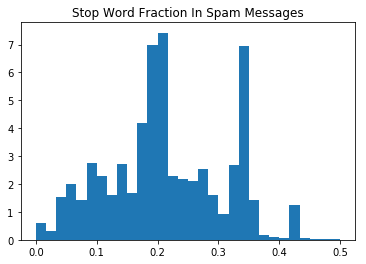

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

display(pd.DataFrame(infoStopCountFrac,columns=['infoStopCountFrac']).describe())
plt.hist(infoStopCountFrac, normed=True, bins=50)
plt.title('Stop Word Fraction In Info Messages')

plt.figure()

display(pd.DataFrame(hamStopCountFrac,columns=['hamStopCountFrac']).describe())
plt.hist(hamStopCountFrac, normed=True, bins=40)
plt.title('Stop Word Fraction In Ham Messages')

plt.figure()

display(pd.DataFrame(spamStopCountFrac,columns=['spamStopCountFrac']).describe())
plt.hist(spamStopCountFrac, normed=True, bins=30)
plt.title('Stop Word Fraction In Spam Messages')

#### Above plots indicate that distrbution of fraction of stop words is different in different classes, hence fraction of stop words in a given sentence may be a good feature to include

### 1.6 Fraction Of Special Character

,spamSpclCountFrac
count,6625.000000
mean,0.008381
std,0.013037
min,0.000000
25%,0.000000
50%,0.000000
75%,0.018519
max,0.084906


,hamSpclCountFrac
count,10000.000000
mean,0.003377
std,0.016864
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.950000


,infoSpclCountFrac
count,13375.000000
mean,0.006826
std,0.010047
min,0.000000
25%,0.000000
50%,0.000000
75%,0.012552
max,0.040323


Text(0.5, 1.0, 'Special Char Fraction In Info Messages')

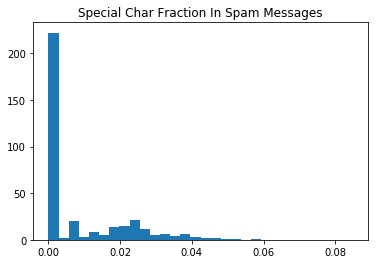

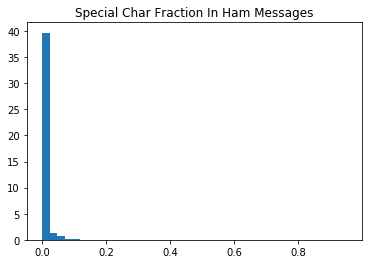

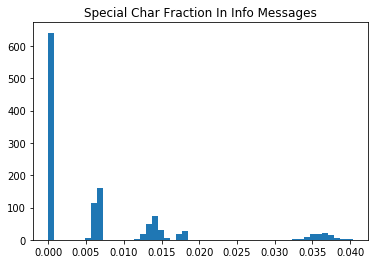

In [11]:
display(pd.DataFrame(spamSpclCountFrac,columns=['spamSpclCountFrac']).describe())
plt.hist(spamSpclCountFrac, normed=True, bins=30)
plt.title("Special Char Fraction In Spam Messages")

display(pd.DataFrame(hamSpclCountFrac,columns=['hamSpclCountFrac']).describe())
plt.figure()
plt.hist(hamSpclCountFrac, normed=True, bins=40)
plt.title("Special Char Fraction In Ham Messages")

display(pd.DataFrame(infoSpclCountFrac,columns=['infoSpclCountFrac']).describe())
plt.figure()
plt.hist(infoSpclCountFrac, normed=True, bins=50)
plt.title("Special Char Fraction In Info Messages")

#### Visual inspection of above plot indicates that there is slight difference in distribution of special characters in messages from  different classes, with most of the mass concentrated around zero in all classes especially for ham-messages
#### This might be a weak feature but hopefully be helpful in conjunction with other features

## 1.7 Affinity Score Of Words For A Class Based On TF-IDF
#### Motive here is to find words based on a score that may act as a weak/strong signature for a class of sentence. Identify Top K(=30) such words for each class and use their score*NumberOf_Occurence_In_Sentece as a feature for sentence representation. Each sentence gets one score for each class. This would be useful only if set of top words for different classes have low intersection

In [20]:
#Remove stop words from all sentences

cleaned = []
for i in range(len(smsData['Message'])):
    clean = smsData['Message'][i]
    clean = clean.lower().split()
    clean = [word for word in clean if word not in stopwordList]
    clean = ' '.join(str(w) for w in clean)
    #print(clean)
    cleaned.append(clean)

In [23]:
#smsData.insert(loc=2, column="Cleaned", value=cleaned)

In [22]:
smsData.head()

,Label,Message,Cleaned,length
0,ham,oh how abt 2 days before Christmas,oh abt 2 days christmas,34
1,info,"Welcome to OVATION HOLD R.No. 184, 114, 395, 3...","welcome ovation hold r.no. 184, 114, 395, 378 ...",95
2,info,Thank you for using your ICICI bank CREDITcard...,thank using icici bank creditcard ending 5253 ...,115
3,ham,schedule a meeting with the entire team in the...,schedule meeting entire team office tomorrow,62
4,ham,Tommy is my brother,tommy brother,19


### Calculate log(Full_Corpus-IDF) * log(Class_Corpus-IDF) for each word for each class in the cleaned list of messages. Then we calculate a quantity, lets call it Apparent_Affinity_For_Class of the word, as log(Full_Corpus-IDF)/log(Class_Corpus-IDF).

#### Above score : 
#### 1) very low for words that are common in corpus as well as class. 
#### 2) score for words Rare in both > Score for words Rare either in class or corpus

#### Each word gets an Apparent_Affinity_For_Class  score for each class
#### Affinity Score(word,Class) = word_freq_In_Class * Apparent_Affinity_For_Class
#### Rare words indciate importance but possibly a word rare in corpus but common in class can be a signature for a particular class. Because we are multiplying with the word's frequency in a class, the words that are rare in corpus but common in class is likey to get higher score than the words that are common in corpus but rare in class, although Apparent_Affinity_For_Class will be higher for both types of words

## Time Out Couldn't Code